In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

# Exploratory Precipitation Analysis

In [9]:
# Look at first 5 rows from measurement table
engine.execute('select * from measurement limit 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [10]:
# inspect data types in measurement
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
measurement_results = session.query(measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs).\
    order_by(measurement.id.asc()).all()

measurement_df = pd.DataFrame(measurement_results, columns=['id', 'station', 'date', 'prcp', 'tobs'])
measurement_df.set_index('id', inplace=True)
measurement_df = measurement_df.dropna()
measurement_df

,station,date,prcp,tobs
id,,,,
1,USC00519397,2010-01-01,0.08,65.0
2,USC00519397,2010-01-02,0.00,63.0
3,USC00519397,2010-01-03,0.00,74.0
4,USC00519397,2010-01-04,0.00,76.0
6,USC00519397,2010-01-07,0.06,70.0
...,...,...,...,...
19544,USC00516128,2017-08-17,0.13,72.0
19546,USC00516128,2017-08-19,0.09,71.0
19548,USC00516128,2017-08-21,0.56,76.0


In [12]:
# Look at first 5 rows from station table
engine.execute('select * from station limit 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [13]:
# inspect data types in station
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
station_results = session.query(station.id, station.station, station.name, station.latitude, station.longitude,  station.elevation).\
    order_by(station.id.asc()).all()

station_df = pd.DataFrame(station_results, columns=['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])
station_df.set_index('id', inplace=True)
station_df = station_df.dropna()
station_df

,station,name,latitude,longitude,elevation
id,,,,,
1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [15]:
# Find the most recent date in the data set.
measurement_df.sort_values(by='date', ascending=False)
last_measurement_date = measurement_df['date'].max()
print(last_measurement_date)

measdate_split = last_measurement_date.split('-')
measdate_split

2017-08-23


['2017', '08', '23']

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Calculate the date one year from the last date in data set.
last_12_months = dt.date(int(measdate_split[0]),
                         int(measdate_split[1]),
                         int(measdate_split[2])) - dt.timedelta(days=365)

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precip_12m_df = measurement_df.loc[measurement_df['date'] >= str(last_12_months)]
# precip_12m_df.set_index('date', inplace=True)
# precip_12m_df.sort_values(by='date', ascending=True)
precip_12m_df

precip_12m_df = precip_12m_df.groupby('date')
precip_12m_df = precip_12m_df[['date', 'prcp']]
precip_12m_df = precip_12m_df.max()
precip_12m_df

,date,prcp
date,,
2016-08-23,2016-08-23,1.79
2016-08-24,2016-08-24,2.28
2016-08-25,2016-08-25,0.21
2016-08-26,2016-08-26,0.04
2016-08-27,2016-08-27,0.18
...,...,...
2017-08-19,2017-08-19,0.09
2017-08-20,2017-08-20,0.01
2017-08-21,2017-08-21,0.56


In [37]:
fmtd_last_date = dt.date(int(measdate_split[0]), int(measdate_split[1]), int(measdate_split[2]))
fmtd_last_date = fmtd_last_date.strftime('%m/%d/%Y')

fmtd_last_12_months = last_12_months.strftime('%m/%d/%Y')

print(fmtd_last_date)
print(fmtd_last_12_months)

08/23/2017
08/23/2016


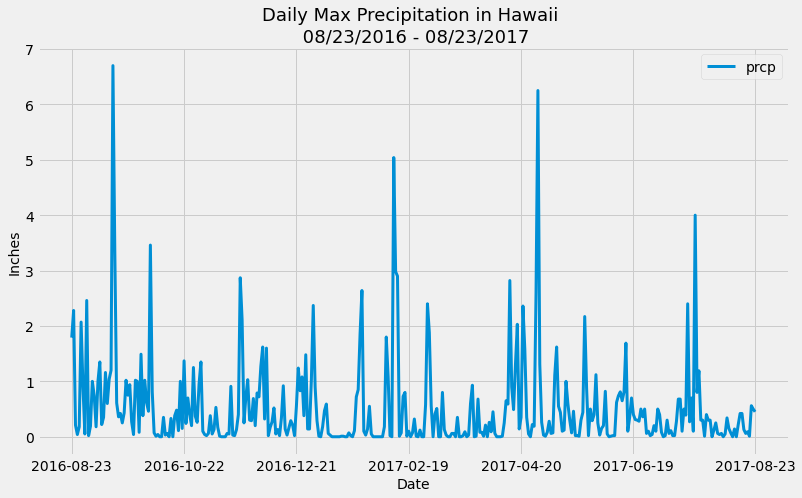

In [40]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams['figure.figsize']=(12,7)
precip_12m_df.plot(linewidth=3, xticks=(0, 60, 120, 180, 240, 300, 365))
plt.title(f'Daily Max Precipitation in Hawaii \n {fmtd_last_12_months} - {fmtd_last_date}', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Inches', fontsize=14)
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_12m_df.describe()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()